In [8]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

In [9]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

## Preprocessing


In [16]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [17]:
df.stops = pd.factorize(df.stops)[0]

In [34]:
df = df.join(pd.get_dummies(df.airline, dtype=int, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, dtype=int, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, dtype=int, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, dtype=int, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, dtype=int, prefix='departure')).drop('departure_time', axis=1)

In [35]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## First regretion model



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [44]:
reg.score(X_test, y_test)

0.985081439837869

In [48]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))

R2: 0.985081439837869
Mean absolute error: 1075.5024311749778
Mean squared error: 7709332.786573399


Text(0.5, 1.0, 'Prediction Vs actual price')

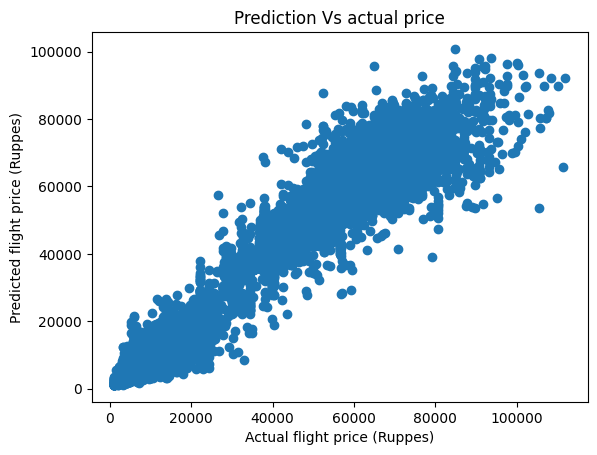

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight price (Ruppes)')
plt.ylabel('Predicted flight price (Ruppes)')
plt.title('Prediction Vs actual price')

## Second regretion model

In [56]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [1.0, 'sqrt']
}

grid_search= GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [1.0, 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [55]:
grid_search.best_estimator_.score(X_test, y_test)

0.9850456418011653

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = grid_search.best_estimator_.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))

R2: 0.9863271430172236
Mean absolute error: 1106.2759155268504
Mean squared error: 7065601.7389007155
